# Community Selection 

In [1]:
from IPython.display import Image
from community_simulator import *
from community_simulator.usertools import *
from community_simulator.visualization import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf
import numpy as np
import scipy as sp
colors = sns.color_palette()
%matplotlib inline

This chunk contains a set of functions and objects that you will need to perform community level selection. We are putting them all together so you can load them once and then they will be available in all subsequent chunks.  You will (hopefully) never need to change any of these functions/objects. 

In [ ]:
# Call essential algorithms for community simulation
exec(open("community_selection/community_simulator-00A-simulation_algorithm.py").read()) # Single algorithm for simulation `simulate_community()`
exec(open("community_selection/community_simulator-01-regional_pool.py").read())
exec(open("community_selection/community_simulator-02-community_function.py").read())
exec(open("community_selection/community_simulator-02A-community_function_student.py").read()) # Student submitted algorithms
exec(open("community_selection/community_simulator-03-community_selection.py").read())
exec(open("community_selection/community_simulator-03A-community_selection_student.py").read()) # Student submitted algorithms
exec(open("community_selection/community_simulator-04-migration.py").read()) 
exec(open("community_selection/community_simulator-04A-migration_student.py").read()) # Student submitted algorithms

# Ctrl
This chunk below performs community assembly without any selection

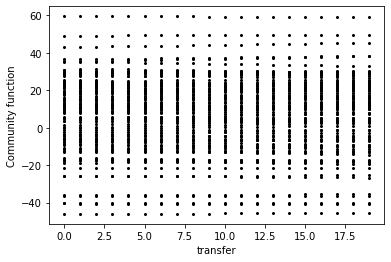

In [7]:
n = 96
np.random.seed(0) #you are all going to get the same species pool
assumptions=a_default.copy() #Start with default parameters
assumptions.update({'n_wells':n, 'c1' :.01, 'muc':0.1, 'm':0})  # default setting
init_state = MakeInitialState(assumptions)
params = MakeParams(assumptions)
species_pool = RegionalSpeciesPool(assumptions) # Generate a species pool

# Make plate
np.random.seed(0) # Change to a unique number so that you each start the experiment with a slightly different species pool
plate1 = Community(init_state,dynamics,params,scale = 10**6,parallel=True) # Reset the community
plate1.N = SampleFromPool(plate1.N,species_pool) # Populate the well by sampling from the species pool

#Propagate for 20 passage each lasting '48hr' and record community function every passage
function_df = list()
for i in range(0,20):
    plate1.Propagate(48)
    community_function = additive_community_function(plate1)
    plate1.Passage(np.eye(n)*1/1000)
    function_df.append(community_function)

# Plot the community function as a function of time 
plot_community_function(function_df)

# Community Level Selection
This chunk below performs community level selection using the pairwize_xz_function.

In [8]:
n = 96
np.random.seed(0) #you are all going to get the same species pool
assumptions=a_default.copy() #Start with default parameters
assumptions.update({'n_wells':n, 'c1' :.01, 'muc':0.1, 'm':0})  # default setting
init_state = MakeInitialState(assumptions)
params = MakeParams(assumptions)
species_pool = RegionalSpeciesPool(assumptions) # Generate a species pool

# Make plate
np.random.seed(0) # Change to a unique number so that you each start the experiment with a slightly different species pool
plate1 = Community(init_state,dynamics,params,scale = 10**6,parallel=True) # Reset the community
plate1.N = SampleFromPool(plate1.N,species_pool) # Populate the well by sampling from the species pool

#Propagate for 20 passage each lasting '48hr' and record community function every passage
function_df = list()
for i in range(0,20):
    selection_plate.Propagate(24)
    community_function = resource_distance_community_function(selection_plate)
    t = pairwise_XZ(community_function)*1/1000
    selection_plate.Passage(t)
    m = migrate_first_half(community_function) 
    selection_plate.N = migrate_from_pool(selection_plate, species_pool, m)
    function_df.append(community_function)
    
# Plot the community function as a function of time 
plot_community_function(function_df)

NameError: name 'selection_plate' is not defined